#  Creating Word Vectors with word2vec

#### Load dependencies 

In [1]:
import nltk
from nltk import word_tokenize, sent_tokenize
import gensim
from gensim.models.word2vec import Word2Vec
from sklearn.manifold import TSNE
import pandas as pd
from bokeh.io import output_notebook
from bokeh.plotting import show, figure
%matplotlib inline

C:\Users\moi\Anaconda3\lib\site-packages\gensim\utils.py:1167: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


English-language sentence tokenizer to tokenize the raw text 
(not all periods end sentences; not all sentences start with a capital letter)

In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\moi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

#### Load data
Gutenberg package: 11 books

In [3]:
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\moi\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

In [4]:
from nltk.corpus import gutenberg
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [5]:
len(gutenberg.fileids())

18

#### Tokenize 

In [6]:
gsents=sent_tokenize(gutenberg.raw())

In [21]:
gsents[0]

'[Emma by Jane Austen 1816]\n\nVOLUME I\n\nCHAPTER I\n\n\nEmma Woodhouse, handsome, clever, and rich, with a comfortable home\nand happy disposition, seemed to unite some of the best blessings\nof existence; and had lived nearly twenty-one years in the world\nwith very little to distress or vex her.'

In [22]:
gutenberg.sents()[0]

['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']']

In [8]:
word_tokenize(gsents[1])[7]

'daughters'

In [9]:
len(gsents)

94428

In [10]:
len(gutenberg.sents())

98552

#### word2vec 

In [11]:
model = Word2Vec(sentences=gutenberg.sents(), size=64, sg=1, window=10, min_count=5, seed=42, workers=3)

we need to specify
* what sentences we're fitting into it
* how many dimensions we're going to have, tutaj size=64 will be more then sufficient
* we use the skip-gram algorithm (not default, small dataset, + for rare words)
* default window size for skip grams (window=10 -> 20 Context Words)
* only on words that appear at least 5 times 
* how many workers you want: how many cores on the machine dedicate to this task


In [12]:
model.save('gutenberg.w2v')

#### Explore model

In [13]:
# skip re-train the model
model = gensim.models.Word2Vec.load('gutenberg.w2v')

In [14]:
model['dog']

C:\Users\moi\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([-0.00573518,  0.02896569, -0.39779937, -0.02019554,  0.1773195 ,
       -0.02016769,  0.6468998 , -0.31812367,  0.44117004, -0.31098923,
       -0.12125847, -0.17409247, -0.5131687 , -0.6508315 ,  0.1279483 ,
       -0.14311628, -0.10588443, -0.00397667,  0.12432621,  0.16504887,
       -0.20222247, -0.28005764,  0.36067802, -0.14757943,  0.05337805,
       -0.22877836,  0.38115507,  0.14591277, -0.0428317 , -0.27847546,
        0.45963585,  0.35021144,  0.08379983,  0.22033724,  0.15899667,
       -0.11627042, -0.21695584, -0.4014701 ,  0.27412567, -0.4931484 ,
        0.09839474, -0.07438331, -0.23702955, -0.10045744, -0.214277  ,
        0.07999903, -0.14904383,  0.680282  , -0.22741109,  0.35978705,
       -0.05509309,  0.1513754 ,  0.21725014,  0.23460826, -0.1991513 ,
        0.03482   , -0.29831606, -0.48203862,  0.3024478 , -0.17602053,
        0.34171063,  0.05130841, -0.2543132 , -0.617933  ], dtype=float32)

In [15]:
model.most_similar('dog')

C:\Users\moi\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('puppy', 0.8320980072021484),
 ('thief', 0.7808293104171753),
 ('cage', 0.7788769006729126),
 ('cow', 0.7651675343513489),
 ('sweeper', 0.759303092956543),
 ('pet', 0.751769483089447),
 ('broth', 0.750663161277771),
 ('shell', 0.7483342885971069),
 ('eel', 0.7411508560180664),
 ('pig', 0.7395258545875549)]

In [16]:
model.most_similar('think')

C:\Users\moi\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('suppose', 0.855829119682312),
 ('contradict', 0.8377948999404907),
 ('downright', 0.8175569772720337),
 ('manage', 0.8156135082244873),
 ('_you_', 0.8139348030090332),
 ('NOW', 0.8088432550430298),
 ('know', 0.8050727248191833),
 ('mean', 0.8046559691429138),
 ('pretend', 0.8004106879234314),
 ('shouldn', 0.7983845472335815)]

In [17]:
model.doesnt_match('mother father daughter dog'.split())

C:\Users\moi\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `doesnt_match` (Method will be removed in 4.0.0, use self.wv.doesnt_match() instead).
  """Entry point for launching an IPython kernel.


'dog'

In [18]:
model.doesnt_match('green blue yellow difficult'.split())

C:\Users\moi\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `doesnt_match` (Method will be removed in 4.0.0, use self.wv.doesnt_match() instead).
  """Entry point for launching an IPython kernel.


'difficult'

In [19]:
model.similarity('father', 'dog')

C:\Users\moi\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.4489104150854277

In [20]:
model.similarity('dog', 'cat')

C:\Users\moi\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.6959517864627742

In [21]:
model.similarity('dog', 'puppy')

C:\Users\moi\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.8320979474008222

In [22]:
model.doesnt_match('dog cat puppy'.split())

C:\Users\moi\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `doesnt_match` (Method will be removed in 4.0.0, use self.wv.doesnt_match() instead).
  """Entry point for launching an IPython kernel.


'cat'

arithmetic

In [28]:
model.most_similar(positive=['father', 'woman'], negative=['man'], topn=3)

C:\Users\moi\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('sister', 0.7913830876350403),
 ('wife', 0.7675045132637024),
 ('mother', 0.7636098861694336)]

In [29]:
model.most_similar(positive=['son', 'woman'], negative=['man'], topn=4)

C:\Users\moi\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('Sarah', 0.7614166140556335),
 ('Leah', 0.7522569298744202),
 ('wife', 0.7505884170532227),
 ('daughter', 0.7435315847396851)]

In [30]:
model.most_similar(positive=['king', 'woman'], negative=['man'], topn=5)

C:\Users\moi\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('Sarah', 0.7573223114013672),
 ('Rachel', 0.7388789057731628),
 ('Hagar', 0.6967670917510986),
 ('Sarai', 0.6932698488235474),
 ('Leah', 0.6914523243904114)]

#### Reduce word vector dimensionality with t-SNE
it's t-Distributed Stochastic Neighbor Embedding
 a (prize-winning) technique for dimensionality reduction that is particularly well suited for the visualization of high-dimensional datasets. <br> <br>
Allows to convert each token from the 64-domensional space into a much more smaller

In [40]:
#how many word do we have here in this vocabulary:
len(model.wv.vocab) 

17011

In [41]:
# the variable captures for each token the location  
X=model[model.wv.vocab]

C:\Users\moi\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [42]:
#create an instance of tsne object
# with 2 components we can easily visualise
tsne=TSNE(n_components=2, n_iter=1000 )

In [43]:
# fitting
X_2d=tsne.fit_transform(X)

In [44]:
#convert that 2D object into a dataframe, to look at
coord_df=pd.DataFrame(X_2d, columns=['X', 'y'])

In [45]:
coord_df['token']=model.wv.vocab.keys()
coord_df.head()

,X,y,token
0,-46.234379,31.724289,[
1,-52.439907,-33.335190,Emma
2,0.133177,-56.762703,by
3,-51.208260,-35.825367,Jane
4,-46.210289,31.676497,]


In [46]:
coord_df.to_csv('gutenberg_tsne.csv', index=False)

#### Visualise 2D representation 

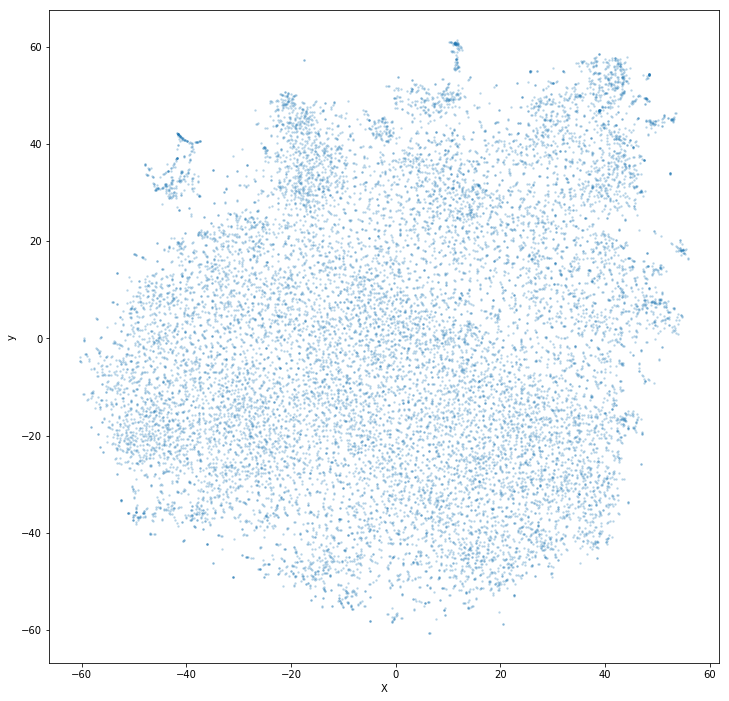

In [54]:
# _ is a placeholder
_ = coord_df.plot.scatter('X', 'y', figsize=(12,12), marker='.', s=10, alpha=0.2)
#figure size 12x12


In [55]:
#bokeh plot, to explore individual words
output_notebook()

Loading BokehJS ...

In [56]:
subset=coord_df.sample(n=5000)

In [62]:
p = figure(plot_width=800, plot_height=800)
_ = p.text(x=subset.X, y=subset.y, text=subset.token)
#_=p.text(X=subset.X, y=subset.y, text=subset.token)
#text= the location 
show(p)

to samo, 17 000 tokens w 2D space
